In [72]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
all_nodes = pd.read_csv("terrorist_attack.nodes", header = None, sep="\t", encoding="utf-8")
edges = pd.read_csv("terrorist_attack_loc.edges", header = None, sep="\t", encoding="utf-8")
labels = pd.read_csv("terrorist_attack.labels", header = None, sep="\t", encoding="utf-8")
edges = edges[0].str.split(' ',expand=True)
labels_extracted = all_nodes[107].str.split('#',expand=True)
labels = labels_extracted[1]
labels = labels.values
#np.save(list_labels.npy, labels)
type(labels)

numpy.ndarray

### Adjacency Matrix:

In [46]:
n_nodes = len(all_nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)
number_link = 0
n2 = 0

for idx, row in edges.iterrows():
    
    i = np.where(all_nodes[0] == row.loc[0])
    j = np.where(all_nodes[0] == row.loc[1])
    n2 = n2 + 1
    
    if (i[0].size != 0 and j[0].size != 0):
        adjacency[i[0], j[0]] = 1
        adjacency[j[0], i[0]] = 1
        number_link = number_link + 1

In [47]:
adjacency.shape

(1293, 1293)

Text(0.5, 1.05, 'adjacency matrix')

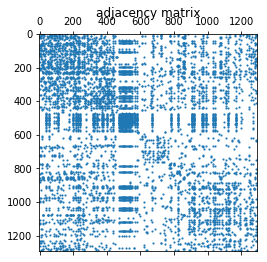

In [48]:
plt.spy(adjacency, markersize=1)
plt.title('adjacency matrix')

In [49]:
degree =  sum(adjacency)

assert len(degree) == n_nodes

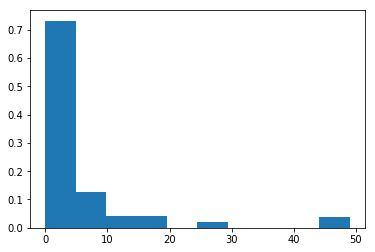

In [50]:
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights);

Giant Component 

In [51]:
G = nx.from_numpy_matrix(adjacency)
graphs = nx.connected_component_subgraphs(G)
graphs = list(graphs)
print(len(graphs))

787


In [79]:
giant = max(graphs, key=len)


In [53]:
A = nx.to_scipy_sparse_matrix(giant)
giant_component = A.todense()

In [54]:
giant_component.shape

(51, 51)

In [55]:
giant_component
GG = nx.from_numpy_matrix(giant_component)

### Laplacian 

In [56]:
deg_matrix = np.diag(degree)
laplacian_combinatorial =  scipy.sparse.csr_matrix(deg_matrix - adjacency)

In [98]:
deg_giant = np.sum(giant_component, axis=0)
deg_giant_matrix = np.diag(deg_giant)

giant_laplacian =  scipy.sparse.csr_matrix(deg_giant_matrix - giant_component)

e, U = scipy.linalg.eig(giant_laplacian.toarray())
inds = e.argsort()
U = U[inds]
e = np.sort(e)

lmax = e[50]

### Graph Plot


C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


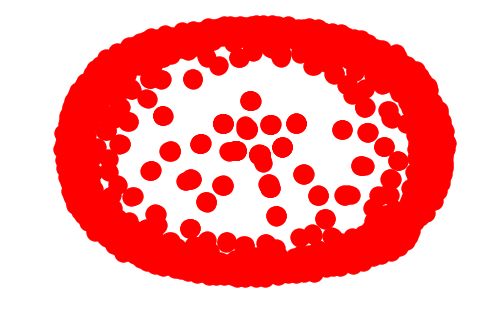

In [57]:
# Complete Graph
nx.draw(G)

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


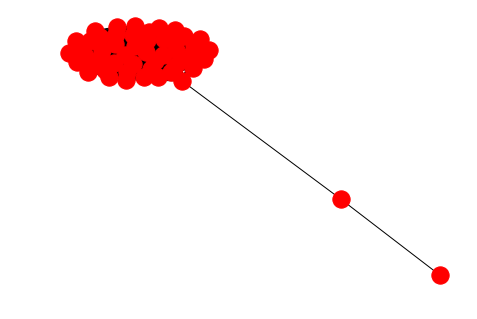

In [39]:
# Giant Component Graph
nx.draw(GG)

### Labels 

In [84]:
labels_giant = labels[giant.nodes]
sorted(giant.nodes)
labels_giant

array(['Bombing', 'Bombing', 'Bombing', 'Weapon_Attack', 'Weapon_Attack',
       'Weapon_Attack', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'other_attack', 'Weapon_Attack', 'Weapon_Attack', 'Weapon_Attack',
       'Bombing', 'Kidnapping', 'Bombing', 'Bombing', 'Bombing',
       'Bombing', 'Bombing', 'Bombing', 'Weapon_Attack', 'Bombing',
       'Bombing', 'Bombing', 'Bombing', 'Bombing', 'Weapon_Attack',
       'Weapon_Attack', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'Weapon_Attack', 'Weapon_Attack', 'Weapon_Attack', 'Bombing',
       'Bombing', 'Bombing', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'Bombing', 'Bombing', 'Bombing', 'Bombing', 'Bombing', 'Bombing',
       'Bombing'], dtype=object)

In [85]:
labels_giant[labels_giant == 'Arson'] = 1
labels_giant[labels_giant == 'Bombing'] = 2
labels_giant[labels_giant == 'Weapon_Attack'] = 3
labels_giant[labels_giant == 'other_attack'] = 4
labels_giant[labels_giant == 'Kidnapping'] = 5

In [86]:
labels_giant

array([2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 4, 3, 3, 3, 2, 5, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=object)

C:\Users\joelle hanna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


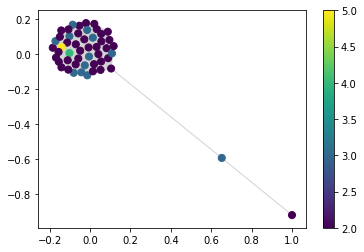

In [113]:
graph = nx.from_scipy_sparse_matrix(scipy.sparse.csr_matrix(giant_component))
coords = nx.spring_layout(graph)

im = nx.draw_networkx_nodes(graph, coords, node_size=50, node_color=labels_giant, edge_labels=labels_giant)
nx.draw_networkx_edges(graph, coords, edge_color='lightgray')
plt.colorbar(im)